In [74]:
%pip install kneed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.pipeline import make_pipeline


In [75]:
 df = pd.read_csv('preprocessed_Diabetes.csv')

In [27]:
scaler = StandardScaler()
Scaled_features = scaler.fit_transform(features)

In [29]:
print ("\n scaled dataframe")
print (Data_scaled.head())


 scaled dataframe
     HighBP  HighChol  CholCheck    Smoker    Stroke  HeartDiseaseorAttack  \
0  0.698638  0.857969   0.116248  1.152906 -0.217913             -0.432098   
1 -1.431356 -1.165543  -8.602325  1.152906 -0.217913             -0.432098   
2  0.698638  0.857969   0.116248 -0.867373 -0.217913             -0.432098   
3  0.698638 -1.165543   0.116248 -0.867373 -0.217913             -0.432098   
4  0.698638  0.857969   0.116248 -0.867373 -0.217913             -0.432098   

   PhysActivity    Fruits   Veggies  AnyHealthcare  NoDocbcCost   GenHlth  \
0     -1.029776 -0.971085  0.578377       0.231021    -0.436436  1.953176   
1      0.971085 -0.971085 -1.728977      -4.328607     2.291288 -0.300489   
2     -1.029776  1.029776 -1.728977       0.231021     2.291288  1.953176   
3      0.971085  1.029776  0.578377       0.231021    -0.436436 -1.427321   
4      0.971085  1.029776  0.578377       0.231021    -0.436436 -1.427321   

   DiffWalk       Sex       Age  Education  Discr

In [76]:
np.random.seed(13)

In [97]:
inertia_values = []
k_value = range(3,10)

for k in k_value :
    Kmeans = KMeans(n_clusters = k,random_state = 13 ,n_init=10)
    Kmeans.fit(df)
    inertia_values.append(Kmeans.inertia_)

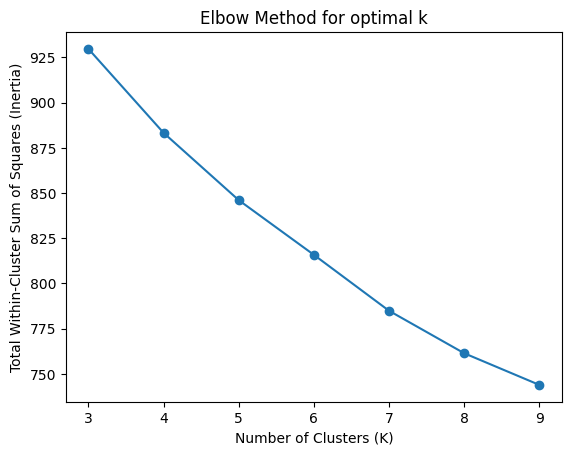

In [98]:
plt.plot(k_value,inertia_values , marker = 'o' )
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for optimal k')
# plt.axvline(x= 5 , linestyle = '--', color = 'red', label = 'chpsen k = 5 ')
#plt.legend()
plt.show()
